In [1]:
import ast
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from collections import Counter
import statsmodels
import datetime
import librosa
from sklearn.model_selection import train_test_split

df = pd.read_csv("../metadata/ted_main.csv")
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))
df['film_year'] = df['film_date'].apply(lambda it: it.year)
df['published_year'] = df['published_date'].apply(lambda it: it.year)

# Filter dataset
print(f"Total talks between 2010-2016: {len(df.loc[(df['film_year'] >= 2010) & (df['film_year'] <= 2016), :])}")

# We will use videos between 2010-2016
df = df.loc[(df['film_year'] >= 2010) & (df['film_year'] <= 2016), :]
# Num_speakers == 1
df = df.loc[df['num_speaker'] == 1, :]
print(len(df))
df

Total talks between 2010-2016: 1796
1758


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_year,published_year
614,1137,Sharing powerful stories from his anti-obesity...,1313,TED2010,2010-02-20 02:00:00,49,Jamie Oliver,Jamie Oliver: Teach every child about food,1,2010-02-11 17:36:00,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 10, 'hero': 'https://pe.tedcdn.com/ima...","Chef, activist","['business', 'education', 'food', 'global issu...",Teach every child about food,https://www.ted.com/talks/jamie_oliver\n,7638978,2010,2010
615,209,"In a demo that drew gasps at TED2010, Blaise A...",465,TED2010,2010-02-11 02:00:00,28,Blaise Agüera y Arcas,Blaise Agüera y Arcas: Augmented-reality maps,1,2010-02-13 11:54:00,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 8...","[{'id': 129, 'hero': 'https://pe.tedcdn.com/im...",Software architect,"['cities', 'design', 'map', 'technology', 'vir...",Augmented-reality maps,https://www.ted.com/talks/blaise_aguera\n,1718568,2010,2010
616,250,The leader of Britain's Conservative Party say...,839,TED2010,2010-02-10 02:00:00,29,David Cameron,David Cameron: The next age of government,1,2010-02-15 16:23:00,"[{'id': 8, 'name': 'Informative', 'count': 233...","[{'id': 604, 'hero': 'https://pe.tedcdn.com/im...",Politician,"['business', 'global issues', 'politics']",The next age of government,https://www.ted.com/talks/david_cameron\n,656762,2010,2010
618,948,"At TED2010, Bill Gates unveils his vision for ...",1669,TED2010,2010-02-12 02:00:00,38,Bill Gates,Bill Gates: Innovating to zero!,1,2010-02-18 03:00:00,"[{'id': 21, 'name': 'Unconvincing', 'count': 1...","[{'id': 51, 'hero': 'https://pe.tedcdn.com/ima...",Philanthropist,"['TED Brain Trust', 'business', 'energy', 'glo...",Innovating to zero!,https://www.ted.com/talks/bill_gates\n,4329332,2010,2010
620,277,The land of the free has become a legal minefi...,1101,TED2010,2010-02-13 02:00:00,24,Philip K. Howard,Philip K. Howard: Four ways to fix a broken le...,1,2010-02-21 11:15:00,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 187, 'hero': 'https://pe.tedcdn.com/im...",Legal activist,"['business', 'design', 'health care', 'law']",Four ways to fix a broken legal system,https://www.ted.com/talks/philip_howard\n,610454,2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,18,Could it be wrong to help children in need by ...,791,TEDxSydney,2016-05-24 03:00:00,5,Tara Winkler,Tara Winkler: Why we need to end the era of or...,1,2017-08-29 23:00:46,"[{'id': 10, 'name': 'Inspiring', 'count': 119}...","[{'id': 1596, 'hero': 'https://pe.tedcdn.com/i...","Child protection leader, activist, author","['TEDx', 'activism', 'children', 'family', 'po...",Why we need to end the era of orphanages,https://www.ted.com/talks/tara_winkler_why_we_...,656113,2016,2017
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,2016-06-08 03:00:00,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,2017-08-31 23:00:31,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,2016,2017
2529,45,"We all have origin stories and identity myths,...",1156,TEDxExeter,2015-04-24 03:00:00,1,Chetan Bhatt,Chetan Bhatt: Dare to refuse the origin myths ...,1,2017-09-01 17:29:03,"[{'id': 9, 'name': 'Ingenious', 'count': 24}, ...","[{'id': 2811, 'hero': 'https://pe.tedcdn.com/i...","Sociologist, human rights activist","['TEDx', 'community', 'humanity', 'identity', ...",Dare to refuse the origin myths that claim who...,https://www.ted.com/talks/chetan_bhatt_dare_to...,857850,2015,2017
2531,18,Terrorists and extremists aren't all naturally...,698,TEDxGhent,2016-06-18 03:00:00,1,Erin Marie Saltman,Erin Marie

In [3]:
# Generate target set
log_views = np.log(df['views'])
df['log_views_norm'] = (log_views - log_views.mean()) / log_views.std()


def map_to_label(value):
    if value < -0.5:
        return "low"
    elif value < 0.5:
        return "medium"
    else:
        return "high"

df['log_views_norm_cat'] = df['log_views_norm'].apply(map_to_label)

In [2]:
merged_metadata_df = pd.read_csv("../metadata/merged_metadata_popularity.csv")
merged_metadata_df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,transcript,filename,film_year,published_year,log_views_norm,log_views_norm_cat
0,1137,Sharing powerful stories from his anti-obesity...,1313,TED2010,2010-02-20 02:00:00,49,Jamie Oliver,Jamie Oliver: Teach every child about food,1,2010-02-11 17:36:00,...,"['business', 'education', 'food', 'global issu...",Teach every child about food,https://www.ted.com/talks/jamie_oliver,7638978,"Sadly, in the next 18 minutes when I do our ch...",2010-jamie-oliver-007-fallback-93948ab6f9d8306...,2010,2010,2.595681,high
1,209,"In a demo that drew gasps at TED2010, Blaise A...",465,TED2010,2010-02-11 02:00:00,28,Blaise Agüera y Arcas,Blaise Agüera y Arcas: Augmented-reality maps,1,2010-02-13 11:54:00,...,"['cities', 'design', 'map', 'technology', 'vir...",Augmented-reality maps,https://www.ted.com/talks/blaise_aguera,1718568,"About a year and a half ago, Stephen Lawler, w...",2010-blaise-aguera-y-arcas-016-fallback-a39ea7...,2010,2010,0.369330,normal
2,250,The leader of Britain's Conservative Party say...,839,TED2010,2010-02-10 02:00:00,29,David Cameron,David Cameron: The next age of government,1,2010-02-15 16:23:00,...,"['business', 'global issues', 'politics']",The next age of government,https://www.ted.com/talks/david_cameron,656762,"Someone once said that politics is, of course,...",2010-david-cameron-009-fallback-e23a18509bb2a0...,2010,2010,-1.066266,low
3,948,"At TED2010, Bill Gates unveils his vision for ...",1669,TED2010,2010-02-12 02:00:00,38,Bill Gates,Bill Gates: Innovating to zero!,1,2010-02-18 03:00:00,...,"['TED Brain Trust', 'business', 'energy', 'glo...",Innovating to zero!,https://www.ted.com/talks/bill_gates,4329332,I'm going to talk today about energy and clima...,2010-bill-gates-006-fallback-69469ceb41a7e17ed...,2010,2010,1.748209,high
4,277,The land of the free has become a legal minefi...,1101,TED2010,2010-02-13 02:00:00,24,Philip K. Howard,Philip K. Howard: Four ways to fix a broken le...,1,2010-02-21 11:15:00,...,"['business', 'design', 'health care', 'law']",Four ways to fix a broken legal system,https://www.ted.com/talks/philip_howard,610454,I've always been interested in the relationshi...,2010-philip-k-howard-005-fallback-a9ddfb85ca66...,2010,2010,-1.175390,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,18,Could it be wrong to help children in need by ...,791,TEDxSydney,2016-05-24 03:00:00,5,Tara Winkler,Tara Winkler: Why we need to end the era of or...,1,2017-08-29 23:00:46,...,"['TEDx', 'activism', 'children', 'family', 'po...",Why we need to end the era of orphanages,https://www.ted.com/talks/tara_winkler_why_we_...,656113,These are some photos of me volunteering in a ...,2016x-tara-winkler-008-fallback-88253cf89ec47f...,2016,2017,-1.067742,low
1698,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,2016-06-08 03:00:00,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,2017-08-31 23:00:31,...,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,Why do people deliberately destroy cultural he...,2016x-chance-coughenour-006-fallback-dbb5bbc79...,2016,2017,-1.360604,low
1699,45,"We all have origin stories and identity myths,...",1156,TEDxExeter,2015-04-24 03:00:00,1,Chetan Bhatt,Chetan Bhatt: Dare to refuse the origin myths ...,1,2017-09-01 17:29:03,...,"['TEDx', 'community', 'humanity', 'identity', ...",Dare to refuse the origin myths that claim who...,https://www.ted.com/talks/chetan_bhatt_dare_to...,857850,"I'm Chetan Bhatt and when I give my name, I'm ...",2015x-chetan-bhatt-004-fallback-e542bdf061f08d...,2015,2017,-0.667629,low
1700,18,Terrorists and extremists aren't all naturally...,698,TEDxGhent,2016-06-18 03:00:00,1,Erin Marie Saltman,Erin Marie Saltman: How young people join viol...,1,2017-09-05 

In [32]:
# Concatenate with features
import json
from audio_features.aggregate import run_aggregation

def get_related_result(row):
    for entry in os.listdir('../modeling_api_results'):
        if not entry.endswith(".wav.json"):
            continue
        
        if entry.split(".wav.json")[0] == row['filename'].split(".wav")[0]:
            with open(os.path.join('../modeling_api_results', entry)) as f:
                return json.load(f)
            
    print(f"File {row['url']} not found in modeling_api_results")
    return None


features_metadata = []

for idx, row in merged_metadata_df.iterrows():
    # Modeling api result
    result = get_related_result(row)
    
    if result is None:
        continue

    # Aggregate with Thodoris script
    mean_posteriors = run_aggregation(result)
    
    # Flatten features
    mean_posteriors_flattened = {}
    for task in mean_posteriors:
        for cls in mean_posteriors[task]:
            if type(mean_posteriors[task][cls]) == dict:  
                for metric, value in mean_posteriors[task][cls].items():
                    mean_posteriors_flattened[f"{task}_{cls}_{metric}"] = value
            else:
                mean_posteriors_flattened[f"{task}_{cls}"] = mean_posteriors[task][cls]
        
    entry = {idx: value for idx, value in row.items()}
    entry.update(mean_posteriors_flattened)
    features_metadata.append(entry)
    
features_metadata_df = pd.DataFrame(features_metadata)
features_metadata_df.to_csv("../metadata/merged_metadata_popularity_features.csv")

File https://www.ted.com/talks/elizabeth_lindsey_curating_humanity_s_heritage not found in modeling_api_results
File https://www.ted.com/talks/danny_hillis_two_frontiers_of_cancer_treatment not found in modeling_api_results
File https://www.ted.com/talks/ahn_trio_a_modern_take_on_piano_violin_cello not found in modeling_api_results
File https://www.ted.com/talks/david_brooks_the_social_animal not found in modeling_api_results
File https://www.ted.com/talks/mark_bezos_a_life_lesson_from_a_volunteer_firefighter not found in modeling_api_results
File https://www.ted.com/talks/angela_belcher_using_nature_to_grow_batteries not found in modeling_api_results
File https://www.ted.com/talks/sandra_fisher_martins_the_right_to_understand not found in modeling_api_results
File https://www.ted.com/talks/jonathan_haidt_humanity_s_stairway_to_self_transcendence not found in modeling_api_results
File https://www.ted.com/talks/jonathan_haidt_humanity_s_stairway_to_self_transcendence not found in modeli

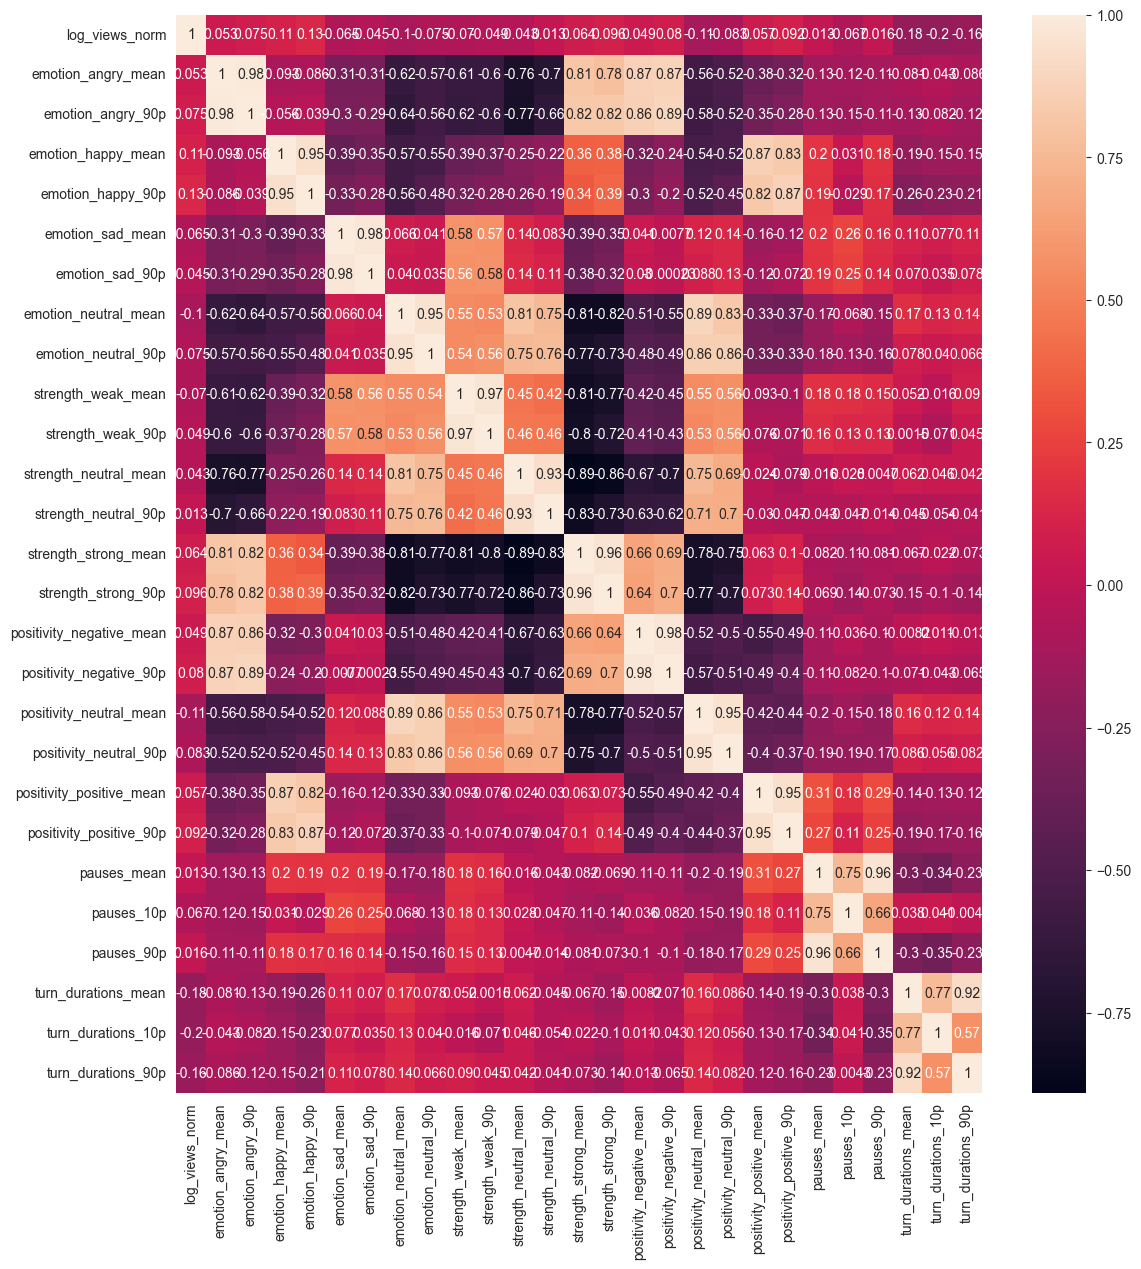

In [31]:
cols = ['log_views_norm', 'emotion_angry_mean',
       'emotion_angry_90p', 'emotion_happy_mean', 'emotion_happy_90p',
       'emotion_sad_mean', 'emotion_sad_90p', 'emotion_neutral_mean',
       'emotion_neutral_90p', 'strength_weak_mean', 'strength_weak_90p',
       'strength_neutral_mean', 'strength_neutral_90p', 'strength_strong_mean',
       'strength_strong_90p', 'positivity_negative_mean',
       'positivity_negative_90p', 'positivity_neutral_mean',
       'positivity_neutral_90p', 'positivity_positive_mean',
       'positivity_positive_90p', 'pauses_mean', 'pauses_10p', 'pauses_90p',
       'turn_durations_mean', 'turn_durations_10p', 'turn_durations_90p']

features_metadata_df[cols].corr()
plt.figure(figsize=(13, 14))
sns.heatmap(features_metadata_df[cols].corr(), annot=True)
plt.show()